In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sn

In [2]:
#Load the data set
df=pd.read_csv('Amazon Sales.csv')

In [3]:
#find the shape of the data set
df.shape

(128975, 22)

In [4]:
#check the file info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 128975 entries, 0 to 128974
Data columns (total 22 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   index               128975 non-null  int64  
 1   Order ID            128975 non-null  object 
 2   Date                128975 non-null  object 
 3   Status              128975 non-null  object 
 4   Fulfilment          128975 non-null  object 
 5   Sales Channel       128975 non-null  object 
 6   ship-service-level  128975 non-null  object 
 7   Style               128975 non-null  object 
 8   SKU                 128975 non-null  object 
 9   Category            128975 non-null  object 
 10  Size                128975 non-null  object 
 11  ASIN                128975 non-null  object 
 12  Courier Status      128975 non-null  object 
 13  Qty                 128975 non-null  int64  
 14  currency            128975 non-null  object 
 15  Amount              128975 non-nul

In [5]:
#describe the data set
df.describe()

,index,Qty,Amount,ship-postal-code
count,128975.000000,128975.000000,128975.000000,128975.000000
mean,64487.000000,0.904431,609.363662,463847.524466
std,37232.019822,0.313354,313.347147,191596.021199
min,0.000000,0.000000,0.000000,0.000000
25%,32243.500000,1.000000,413.000000,382421.000000
50%,64487.000000,1.000000,583.000000,500033.000000
75%,96730.500000,1.000000,771.000000,600024.000000
max,128974.000000,15.000000,5584.000000,989898.000000


In [6]:
# pip install ydata-profiling
# pip install ipywidgets

In [7]:
# from ydata_profiling import ProfileReport
# profile=ProfileReport(df)
# profile.to_html()

In [8]:
#Check whether the date in correct format
type(df['Date'][0])

str

In [9]:
#date/month/year - year/month/date
#22/

#convert year from 22/ to 2022/

df['Date']=df['Date'].replace({'22/':"2022/"},regex=True)

In [10]:
df['Date'][0]

'2022/04/30'

In [11]:
type(df['Date'][0])

str

In [12]:
df.head()

,index,Order ID,Date,Status,Fulfilment,Sales Channel,ship-service-level,Style,SKU,Category,...,Courier Status,Qty,currency,Amount,ship-city,ship-state,ship-postal-code,ship-country,promotion-ids,B2B
0,0,405-8078784-5731545,2022/04/30,Cancelled,Merchant,Amazon.in,Standard,SET389,SET389-KR-NP-S,Set,...,Not Shipped,0,INR,647.62,MUMBAI,MAHARASHTRA,400081,IN,No Promotion,False
1,1,171-9198151-1101146,2022/04/30,Shipped - Delivered to Buyer,Merchant,Amazon.in,Standard,JNE3781,JNE3781-KR-XXXL,kurta,...,Shipped,1,INR,406.00,BENGALURU,KARNATAKA,560085,IN,Amazon PLCC Free-Financing Universal Merchant ...,False
2,2,404-0687676-7273146,2022/04/30,Shipped,Amazon,Amazon.in,Expedited,JNE3371,JNE3371-KR-XL,kurta,...,Shipped,1,INR,329.00,NAVI MUMBAI,MAHARASHTRA,410210,IN,IN Core Free Shipping 2015/04/08 23-48-5-108,True
3,3,403-9615377-8133951,2022/04/30,Cancelled,Merchant,Amazon.in,Standard,J0341,J0341-DR-L,Western Dress,...,Not Shipped,0,INR,753.33,PUDUCHERRY,PUDUCHERRY,605008,IN,No Promotion,False
4,4,407-1069790-7240320,2022/04/30,Shipped,Amazon,Amazon.in,Expedited,JNE3671,JNE3671-TU-XXXL,Top,...,Shipped,1,INR,574.00,CHENNAI,TAMIL NADU,600073,IN,No Promotion,False


In [13]:
#convert date from string format to date format
df['Date']=pd.to_datetime(df['Date'])

In [14]:
type(df['Date'][0])

pandas._libs.tslibs.timestamps.Timestamp

In [15]:
df.columns

Index(['index', 'Order ID', 'Date', 'Status', 'Fulfilment', 'Sales Channel',
       'ship-service-level', 'Style', 'SKU', 'Category', 'Size', 'ASIN',
       'Courier Status', 'Qty', 'currency', 'Amount', 'ship-city',
       'ship-state', 'ship-postal-code', 'ship-country', 'promotion-ids',
       'B2B'],
      dtype='object')

In [16]:
df.isna().sum()

index                  0
Order ID               0
Date                   0
Status                 0
Fulfilment             0
Sales Channel          0
ship-service-level     0
Style                  0
SKU                    0
Category               0
Size                   0
ASIN                   0
Courier Status         0
Qty                    0
currency               0
Amount                 0
ship-city             33
ship-state            33
ship-postal-code       0
ship-country          33
promotion-ids          0
B2B                    0
dtype: int64

# Find total Revenue


In [17]:
df['Amount'].sum()

78592678.29999998

In [18]:
round(df['Amount'].sum())

78592678

# Find total Sales Quantity

In [19]:
df['Qty'].sum()

116649

# Find total Orders

In [20]:
df['Order ID'].count()

128975

# Find Average Order Value

In [21]:
df['Amount'].sum()/df['Order ID'].count()

609.3636619499902

In [22]:
round(df['Amount'].sum()/df['Order ID'].count(),2)

609.36

# Find The highest product ordered by category


In [23]:
df['Category'].unique()

array(['Set', 'kurta', 'Western Dress', 'Top', 'Ethnic Dress', 'Bottom',
       'Saree', 'Blouse', 'Dupatta'], dtype=object)

In [24]:
df['Category'].count()

128975

In [25]:
df['Category'].value_counts()

Category
Set              50284
kurta            49877
Western Dress    15500
Top              10622
Ethnic Dress      1159
Blouse             926
Bottom             440
Saree              164
Dupatta              3
Name: count, dtype: int64

In [26]:
graph=pd.DataFrame(df['Category'].value_counts()).reset_index()
graph

,Category,count
0,Set,50284
1,kurta,49877
2,Western Dress,15500
3,Top,10622
4,Ethnic Dress,1159
5,Blouse,926
6,Bottom,440
7,Saree,164
8,Dupatta,3


<Axes: xlabel='Category', ylabel='count'>

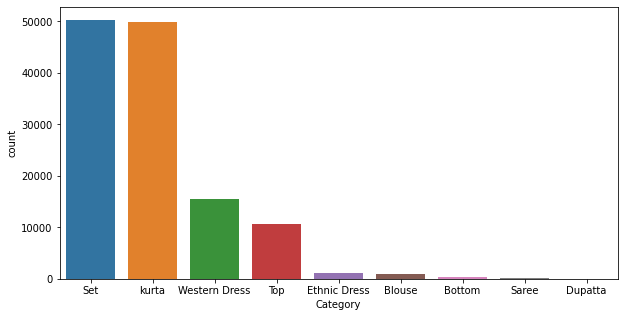

In [27]:
plt.figure(figsize=(10,5))
sn.barplot(data=graph,x='Category',y='count')

In [28]:
df['Category'].value_counts().max()

50284

In [29]:
newdf=df['Category'].value_counts()==df['Category'].value_counts().max()
newdf

Category
Set               True
kurta            False
Western Dress    False
Top              False
Ethnic Dress     False
Blouse           False
Bottom           False
Saree            False
Dupatta          False
Name: count, dtype: bool

In [30]:
df1=df[ df['Category'].map(df['Category'].value_counts())==df['Category'].value_counts().max()]
df1['Category'][0]

'Set'

# Find Top 5 products ordered(Most Popular)


In [31]:
df['Category'].value_counts().nlargest(5)

Category
Set              50284
kurta            49877
Western Dress    15500
Top              10622
Ethnic Dress      1159
Name: count, dtype: int64

In [32]:
newdf=pd.DataFrame(df['Category'].value_counts().nlargest(5)).reset_index()
newdf

,Category,count
0,Set,50284
1,kurta,49877
2,Western Dress,15500
3,Top,10622
4,Ethnic Dress,1159


<Axes: xlabel='Category', ylabel='count'>

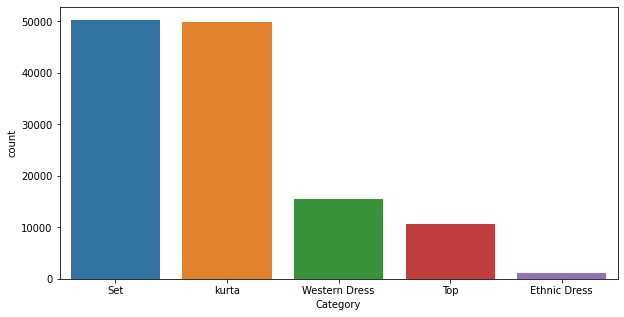

In [33]:
plt.figure(figsize=(10,5))
sn.barplot(data=newdf,x='Category',y='count')

# Find Total Revenue Over Different Months


In [34]:
#df['Amount'].sum()
#type(df['Date'][0])
df['Date'].dt.month

0         4
1         4
2         4
3         4
4         4
         ..
128970    5
128971    5
128972    5
128973    5
128974    5
Name: Date, Length: 128975, dtype: int32

In [35]:
df['Month']=df['Date'].dt.month_name()

In [36]:
df.head(2)

,index,Order ID,Date,Status,Fulfilment,Sales Channel,ship-service-level,Style,SKU,Category,...,Qty,currency,Amount,ship-city,ship-state,ship-postal-code,ship-country,promotion-ids,B2B,Month
0,0,405-8078784-5731545,2022-04-30,Cancelled,Merchant,Amazon.in,Standard,SET389,SET389-KR-NP-S,Set,...,0,INR,647.62,MUMBAI,MAHARASHTRA,400081,IN,No Promotion,False,April
1,1,171-9198151-1101146,2022-04-30,Shipped - Delivered to Buyer,Merchant,Amazon.in,Standard,JNE3781,JNE3781-KR-XXXL,kurta,...,1,INR,406.00,BENGALURU,KARNATAKA,560085,IN,Amazon PLCC Free-Financing Universal Merchant ...,False,April


In [37]:
df['Month'].unique()

array(['April', 'March', 'May', 'June'], dtype=object)

In [38]:
graphframe=df.groupby(df['Month'])['Amount'].sum().sort_values(ascending=False).reset_index()
graphframe

,Month,Amount
0,April,28838708.32
1,May,26226476.75
2,June,23425809.38
3,March,101683.85


<Axes: xlabel='Month', ylabel='Amount'>

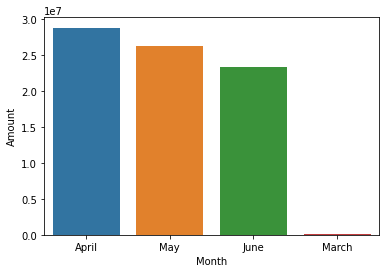

In [39]:
sn.barplot(data=graphframe,x='Month',y='Amount')

# Find Peak Revenue By Month


In [40]:
df.groupby(df['Month'])['Amount'].sum().sort_values(ascending=False).nlargest(1)

Month
April    28838708.32
Name: Amount, dtype: float64

# Find Total Revenue Over Different Days


In [41]:
df['Date'].dt.day

0         30
1         30
2         30
3         30
4         30
          ..
128970    31
128971    31
128972    31
128973    31
128974    31
Name: Date, Length: 128975, dtype: int32

In [42]:
df['Day']=df['Date'].dt.day

In [43]:
df.head(2)

,index,Order ID,Date,Status,Fulfilment,Sales Channel,ship-service-level,Style,SKU,Category,...,currency,Amount,ship-city,ship-state,ship-postal-code,ship-country,promotion-ids,B2B,Month,Day
0,0,405-8078784-5731545,2022-04-30,Cancelled,Merchant,Amazon.in,Standard,SET389,SET389-KR-NP-S,Set,...,INR,647.62,MUMBAI,MAHARASHTRA,400081,IN,No Promotion,False,April,30
1,1,171-9198151-1101146,2022-04-30,Shipped - Delivered to Buyer,Merchant,Amazon.in,Standard,JNE3781,JNE3781-KR-XXXL,kurta,...,INR,406.00,BENGALURU,KARNATAKA,560085,IN,Amazon PLCC Free-Financing Universal Merchant ...,False,April,30


In [44]:
df.groupby(df['Day'])['Amount'].sum().sort_values(ascending=False).sort_index()

Day
1     2880866.33
2     2982101.41
3     2940626.16
4     2983899.44
5     2834341.25
6     2751791.52
7     2787150.37
8     2886262.76
9     2742205.46
10    2597647.85
11    2553751.13
12    2535886.78
13    2591301.52
14    2780893.47
15    2704277.12
16    2552016.64
17    2453111.63
18    2424747.92
19    2467922.21
20    2553599.33
21    2474227.64
22    2534501.76
23    2504196.66
24    2472291.63
25    2451477.80
26    2451979.43
27    2378135.82
28    2461434.22
29    2068181.90
30    1787098.20
31    1004752.94
Name: Amount, dtype: float64

In [45]:
linegrpah=pd.DataFrame(df.groupby(df['Day'])['Amount'].sum().sort_values(ascending=False).sort_index()).reset_index()
linegrpah

,Day,Amount
0,1,2880866.33
1,2,2982101.41
2,3,2940626.16
3,4,2983899.44
4,5,2834341.25
5,6,2751791.52
6,7,2787150.37
7,8,2886262.76
8,9,2742205.46
9,10,2597647.85


c:\users\kaplane30\appdata\local\programs\python\python39\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\users\kaplane30\appdata\local\programs\python\python39\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='Day', ylabel='Amount'>

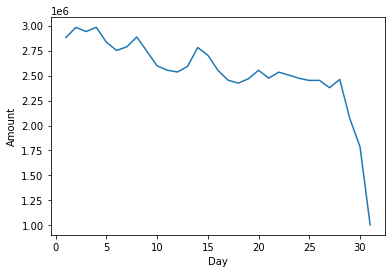

In [46]:
sn.lineplot(data=linegrpah,x='Day',y='Amount')

# Find Peak Revenue By Days

In [47]:
linegrpah=pd.DataFrame(df.groupby(df['Day'])['Amount'].sum().sort_values(ascending=False)).reset_index()
linegrpah.head(3)

,Day,Amount
0,4,2983899.44
1,2,2982101.41
2,3,2940626.16


# Find Revenue By Category


In [48]:
#Amount, Category, group by ,sum(),


df.groupby(df['Category'])['Amount'].sum().sort_values(ascending=False)


Category
Set              39204124.03
kurta            21299546.70
Western Dress    11216072.69
Top               5347792.30
Ethnic Dress       791217.66
Blouse             458408.18
Bottom             150667.98
Saree              123933.76
Dupatta               915.00
Name: Amount, dtype: float64

In [49]:
df.groupby(df['Category'])['Amount'].sum().sort_values(ascending=False).nlargest(3)


Category
Set              39204124.03
kurta            21299546.70
Western Dress    11216072.69
Name: Amount, dtype: float64

In [50]:
graph=df.groupby(df['Category'])['Amount'].sum().sort_values(ascending=False).reset_index()
graph

,Category,Amount
0,Set,39204124.03
1,kurta,21299546.70
2,Western Dress,11216072.69
3,Top,5347792.30
4,Ethnic Dress,791217.66
5,Blouse,458408.18
6,Bottom,150667.98
7,Saree,123933.76
8,Dupatta,915.00


<Axes: xlabel='Category', ylabel='Amount'>

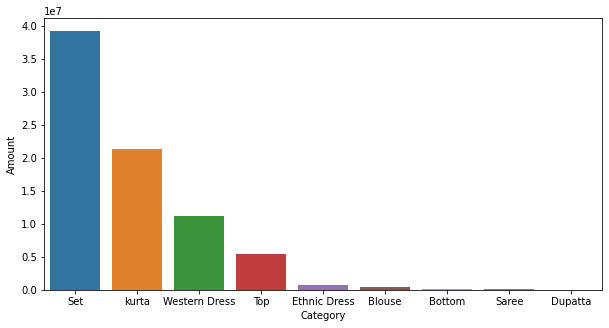

In [51]:
plt.figure(figsize=(10,5))
sn.barplot(data=graph,x='Category',y='Amount')

# Find Percentage of Revenue by Category


In [52]:
pd.DataFrame(df.groupby(df['Category'])['Amount'].sum().sort_values(ascending=False)).reset_index()


,Category,Amount
0,Set,39204124.03
1,kurta,21299546.70
2,Western Dress,11216072.69
3,Top,5347792.30
4,Ethnic Dress,791217.66
5,Blouse,458408.18
6,Bottom,150667.98
7,Saree,123933.76
8,Dupatta,915.00


In [53]:
amountdf=pd.DataFrame({"Amount_By_Category":df.groupby(df['Category'])['Amount'].sum().sort_values(ascending=False)}).reset_index()


In [54]:
amountdf['Amount By %']=amountdf['Amount_By_Category']*100/sum(amountdf['Amount_By_Category'])

In [55]:
amountdf


,Category,Amount_By_Category,Amount By %
0,Set,39204124.03,49.882667
1,kurta,21299546.70,27.101184
2,Western Dress,11216072.69,14.271142
3,Top,5347792.30,6.804441
4,Ethnic Dress,791217.66,1.006732
5,Blouse,458408.18,0.583271
6,Bottom,150667.98,0.191707
7,Saree,123933.76,0.157691
8,Dupatta,915.00,0.001164


<Axes: xlabel='Category', ylabel='Amount By %'>

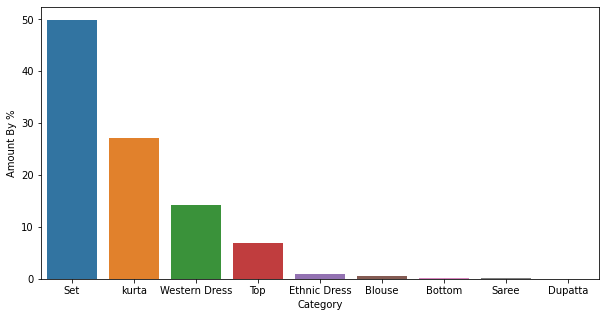

In [56]:
plt.figure(figsize=(10,5))
sn.barplot(data=amountdf,x='Category',y='Amount By %')

# Find Revenue By Size

In [57]:
newdf=pd.DataFrame({"Revenue_By_Size":df.groupby(df['Size'])['Amount'].sum().sort_values(ascending=False)}).reset_index()
newdf

,Size,Revenue_By_Size
0,M,13906754.37
1,L,13234886.19
2,XL,12464965.86
3,XXL,10636288.45
4,S,10629210.18
5,3XL,9157147.68
6,XS,7022375.20
7,6XL,576249.33
8,5XL,425156.63
9,4XL,334451.64


<Axes: xlabel='Size', ylabel='Revenue_By_Size'>

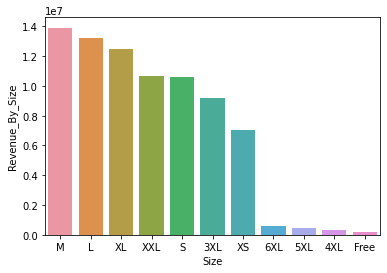

In [58]:
sn.barplot(data=newdf,x='Size',y='Revenue_By_Size')

([<matplotlib.patches.Wedge at 0x298ed5a22b0>,
 [Text(1.6818673605159882, 1.0448551007823925, 'M'),
  Text(-0.1385559966058672, 1.975146130240635, 'L'),
  Text(-1.7621931781305469, 0.9028151543644818, 'XL'),
  Text(-1.7829112135179468, -0.8611780331104381, 'XXL'),
  Text(-0.5296140383202135, -1.907854546451106, 'S'),
  Text(0.984068866988456, -1.718140991020253, '3XL'),
  Text(1.82067402461086, -0.7781684239978481, 'XS'),
  Text(2.9650627116067594, -0.2979985171761324, '6XL'),
  Text(2.9746129880398353, -0.17910212557287636, '5XL'),
  Text(2.9786792495590664, -0.08871261604888779, '4XL'),
  Text(2.9798997524410717, -0.024443105400883236, 'Free')],
 [Text(0.9173821966450845, 0.5699209640631232, '17.69%'),
  Text(-0.07557599814865484, 1.0773524346767098, '16.84%'),
  Text(-0.9611962789802984, 0.4924446296533537, '15.86%'),
  Text(-0.9724970255552438, -0.4697334726056935, '13.53%'),
  Text(-0.2888803845382983, -1.040647934427876, '13.52%'),
  Text(0.5367648365391577, -0.9371678132837743, 

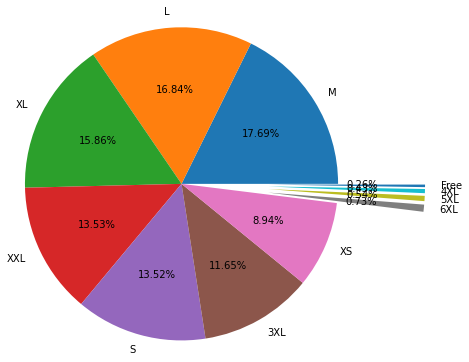

In [59]:
plt.pie(newdf['Revenue_By_Size'],radius=1.8,labels=newdf['Size'],explode=[0,0,0,0,0,0,0,1,1,1,1],autopct='%0.2f%%')

# Find Percentage of Revenue by Size


In [60]:
newdf['Percent']=round(newdf['Revenue_By_Size']*100/sum(newdf['Revenue_By_Size']),2)
newdf

,Size,Revenue_By_Size,Percent
0,M,13906754.37,17.69
1,L,13234886.19,16.84
2,XL,12464965.86,15.86
3,XXL,10636288.45,13.53
4,S,10629210.18,13.52
5,3XL,9157147.68,11.65
6,XS,7022375.20,8.94
7,6XL,576249.33,0.73
8,5XL,425156.63,0.54
9,4XL,334451.64,0.43


# Find Top Citys By Revenue


In [61]:
#Amount, 'ship-city
newdf=pd.DataFrame({'Revenue_By_City':df.groupby(df['ship-city'])['Amount'].sum().sort_values(ascending=False)}).reset_index()
newdf

,ship-city,Revenue_By_City
0,BENGALURU,7257748.80
1,HYDERABAD,5599822.35
2,MUMBAI,4293210.16
3,NEW DELHI,3952690.20
4,CHENNAI,3606917.94
...,...,...
7292,Vaniyambalam,0.00
7293,GOSAINGANJ FAIZABAD DISTRICT ayodhya,0.00
7294,GORESWAR,0.00
7295,MATHABHANGA,0.00


<Axes: xlabel='ship-city', ylabel='Revenue_By_City'>

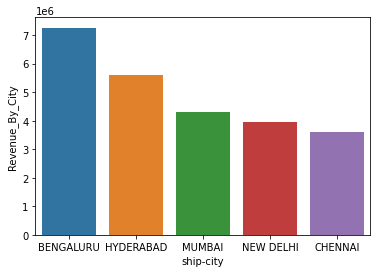

In [68]:
sn.barplot(data=newdf.head(),x='ship-city',y='Revenue_By_City')

In [63]:
newdf.head()

,ship-city,Revenue_By_City
0,BENGALURU,7257748.80
1,HYDERABAD,5599822.35
2,MUMBAI,4293210.16
3,NEW DELHI,3952690.20
4,CHENNAI,3606917.94


# Task - Find Percentage of Revenue By City


# Find Top States By Order


In [74]:
#Order ID, ''ship-state
newdf=pd.DataFrame({'OrderCount_By_States':df.groupby(df['ship-state'])['Order ID'].count().sort_values(ascending=False)}).reset_index()
newdf

,ship-state,OrderCount_By_States
0,MAHARASHTRA,22260
1,KARNATAKA,17326
2,TAMIL NADU,11483
3,TELANGANA,11330
4,UTTAR PRADESH,10638
5,DELHI,6967
6,KERALA,6585
7,WEST BENGAL,5963
8,ANDHRA PRADESH,5430
9,Gujarat,4489


In [75]:
newdf.head(10)

,ship-state,OrderCount_By_States
0,MAHARASHTRA,22260
1,KARNATAKA,17326
2,TAMIL NADU,11483
3,TELANGANA,11330
4,UTTAR PRADESH,10638
5,DELHI,6967
6,KERALA,6585
7,WEST BENGAL,5963
8,ANDHRA PRADESH,5430
9,Gujarat,4489


# Task - Find Percentage Order of Contribution By State


In [77]:
newdf['OrderCount_By_States %']=newdf['OrderCount_By_States']*100/sum(newdf['OrderCount_By_States'])
newdf.head()

,ship-state,OrderCount_By_States,OrderCount_By_States %
0,MAHARASHTRA,22260,17.263576
1,KARNATAKA,17326,13.437049
2,TAMIL NADU,11483,8.905554
3,TELANGANA,11330,8.786896
4,UTTAR PRADESH,10638,8.250221


# Find Top States By Revenue

In [72]:
#Order ID, ''ship-state
newdf=pd.DataFrame({'Revenue_By_States':df.groupby(df['ship-state'])['Amount'].sum().sort_values(ascending=False)}).reset_index()
newdf

,ship-state,Revenue_By_States
0,MAHARASHTRA,13335534.14
1,KARNATAKA,10481114.37
2,TELANGANA,6916615.65
3,UTTAR PRADESH,6816642.08
4,TAMIL NADU,6515650.11
5,DELHI,4346412.46
6,KERALA,3830227.58
7,WEST BENGAL,3507880.44
8,ANDHRA PRADESH,3219831.72
9,HARYANA,2882092.99


In [73]:
newdf.head()

,ship-state,Revenue_By_States
0,MAHARASHTRA,13335534.14
1,KARNATAKA,10481114.37
2,TELANGANA,6916615.65
3,UTTAR PRADESH,6816642.08
4,TAMIL NADU,6515650.11


# Task - Find Percentage of Revenue By State


# Find Shows the Cancelled Ordered


In [79]:
df['Status'].unique()

array(['Cancelled', 'Shipped - Delivered to Buyer', 'Shipped',
       'Shipped - Returned to Seller', 'Shipped - Rejected by Buyer',
       'Shipped - Lost in Transit', 'Shipped - Out for Delivery',
       'Shipped - Returning to Seller', 'Shipped - Picked Up', 'Pending',
       'Pending - Waiting for Pick Up', 'Shipped - Damaged', 'Shipping'],
      dtype=object)

In [83]:
cancelled_df=df[df['Status']=='Cancelled']
cancelled_df.head()

,index,Order ID,Date,Status,Fulfilment,Sales Channel,ship-service-level,Style,SKU,Category,...,currency,Amount,ship-city,ship-state,ship-postal-code,ship-country,promotion-ids,B2B,Month,Day
0,0,405-8078784-5731545,2022-04-30,Cancelled,Merchant,Amazon.in,Standard,SET389,SET389-KR-NP-S,Set,...,INR,647.62,MUMBAI,MAHARASHTRA,400081,IN,No Promotion,False,April,30
3,3,403-9615377-8133951,2022-04-30,Cancelled,Merchant,Amazon.in,Standard,J0341,J0341-DR-L,Western Dress,...,INR,753.33,PUDUCHERRY,PUDUCHERRY,605008,IN,No Promotion,False,April,30
8,8,407-5443024-5233168,2022-04-30,Cancelled,Amazon,Amazon.in,Expedited,SET200,SET200-KR-NP-A-XXXL,Set,...,INR,0.00,HYDERABAD,TELANGANA,500008,IN,IN Core Free Shipping 2015/04/08 23-48-5-108,False,April,30
23,23,404-6019946-2909948,2022-04-30,Cancelled,Merchant,Amazon.in,Standard,SET291,SET291-KR-PP-M,Set,...,INR,570.48,pune,MAHARASHTRA,411044,IN,No Promotion,False,April,30
29,29,404-5933402-8801952,2022-04-30,Cancelled,Merchant,Amazon.in,Standard,JNE2132,JNE2132-KR-398-XXXL,kurta,...,INR,0.00,GUWAHATI,ASSAM,781003,IN,No Promotion,False,April,30


In [85]:
cancelled_df[['Order ID','Status']]
#Task - State wise cancel
#Task - City wise cancel
#Task -Fulfilment wise cancel

,Order ID,Status
0,405-8078784-5731545,Cancelled
3,403-9615377-8133951,Cancelled
8,407-5443024-5233168,Cancelled
23,404-6019946-2909948,Cancelled
29,404-5933402-8801952,Cancelled
...,...,...
128961,402-0082204-6323568,Cancelled
128962,408-9803724-6565965,Cancelled
128965,408-5154281-4593912,Cancelled
128967,404-5182288-1653947,Cancelled


# Find Trends/count in Order Status


In [95]:
#Status
#Status trends

newdf=pd.DataFrame({"Status_Trends":df.groupby(df['Status'])['Status'].count().sort_values(ascending=False)}).reset_index()
newdf

,Status,Status_Trends
0,Shipped,77804
1,Shipped - Delivered to Buyer,28769
2,Cancelled,18332
3,Shipped - Returned to Seller,1953
4,Shipped - Picked Up,973
5,Pending,658
6,Pending - Waiting for Pick Up,281
7,Shipped - Returning to Seller,145
8,Shipped - Out for Delivery,35
9,Shipped - Rejected by Buyer,11


# Find To Check B2B and B2C Customers


In [97]:
df[df['B2B']==True].head()

,index,Order ID,Date,Status,Fulfilment,Sales Channel,ship-service-level,Style,SKU,Category,...,currency,Amount,ship-city,ship-state,ship-postal-code,ship-country,promotion-ids,B2B,Month,Day
2,2,404-0687676-7273146,2022-04-30,Shipped,Amazon,Amazon.in,Expedited,JNE3371,JNE3371-KR-XL,kurta,...,INR,329.0,NAVI MUMBAI,MAHARASHTRA,410210,IN,IN Core Free Shipping 2015/04/08 23-48-5-108,True,April,30
241,241,407-5766340-7411567,2022-04-30,Shipped,Amazon,Amazon.in,Expedited,JNE3440,JNE3440-KR-N-XS,kurta,...,INR,399.0,Ahmedabad,Gujarat,380022,IN,IN Core Free Shipping 2015/04/08 23-48-5-108,True,April,30
657,657,405-9201316-2870743,2022-04-30,Shipped - Delivered to Buyer,Merchant,Amazon.in,Standard,J0117,J0117-TP-XXL,Top,...,INR,518.0,MIHAN,MAHARASHTRA,441110,IN,Amazon PLCC Free-Financing Universal Merchant ...,True,April,30
859,859,407-6114533-2816312,2022-04-30,Shipped - Delivered to Buyer,Merchant,Amazon.in,Standard,JNE3722,JNE3722-KR-L,kurta,...,INR,280.0,MADIKERI,KARNATAKA,571201,IN,Amazon PLCC Free-Financing Universal Merchant ...,True,April,30
860,860,407-6002733-2903540,2022-04-30,Shipped,Amazon,Amazon.in,Expedited,JNE3480,JNE3480-KR-M,kurta,...,INR,249.0,MADIKERI,KARNATAKA,571201,IN,IN Core Free Shipping 2015/04/08 23-48-5-108,True,April,30


In [98]:
df[df['B2B']==False].head()

,index,Order ID,Date,Status,Fulfilment,Sales Channel,ship-service-level,Style,SKU,Category,...,currency,Amount,ship-city,ship-state,ship-postal-code,ship-country,promotion-ids,B2B,Month,Day
0,0,405-8078784-5731545,2022-04-30,Cancelled,Merchant,Amazon.in,Standard,SET389,SET389-KR-NP-S,Set,...,INR,647.62,MUMBAI,MAHARASHTRA,400081,IN,No Promotion,False,April,30
1,1,171-9198151-1101146,2022-04-30,Shipped - Delivered to Buyer,Merchant,Amazon.in,Standard,JNE3781,JNE3781-KR-XXXL,kurta,...,INR,406.00,BENGALURU,KARNATAKA,560085,IN,Amazon PLCC Free-Financing Universal Merchant ...,False,April,30
3,3,403-9615377-8133951,2022-04-30,Cancelled,Merchant,Amazon.in,Standard,J0341,J0341-DR-L,Western Dress,...,INR,753.33,PUDUCHERRY,PUDUCHERRY,605008,IN,No Promotion,False,April,30
4,4,407-1069790-7240320,2022-04-30,Shipped,Amazon,Amazon.in,Expedited,JNE3671,JNE3671-TU-XXXL,Top,...,INR,574.00,CHENNAI,TAMIL NADU,600073,IN,No Promotion,False,April,30
5,5,404-1490984-4578765,2022-04-30,Shipped,Amazon,Amazon.in,Expedited,SET264,SET264-KR-NP-XL,Set,...,INR,824.00,GHAZIABAD,UTTAR PRADESH,201102,IN,IN Core Free Shipping 2015/04/08 23-48-5-108,False,April,30


# Find Distribution of B2B and B2C Customers



In [116]:
newdf=pd.DataFrame({"Count_Business_Type":df.groupby(df['B2B'])['B2B'].count()}).reset_index()
newdf['B2B']=newdf['B2B'].astype('str')


#newdf.info()
newdf['B2B']=newdf['B2B'].replace({"True":"B2B","False":"B2C"})
newdf

,B2B,Count_Business_Type
0,B2C,128104
1,B2B,871


# Task - Find Percentage Distribution Of B2B & B2C Customers


# Task - Find Orders Fulfilment

In [117]:
#group by fulfilment
#count

df['Fulfilment'].unique()

array(['Merchant', 'Amazon'], dtype=object)

# Task - Find Percentage Distribution of Order Fulfilment


# Average Quantity Of Product Ordered


In [121]:
#quantity

df['Qty'].mean()
#df['Qty'].sum()/df['Order ID'].count()

0.9044310912967629

# The most Common Promotion


In [126]:
df['promotion-ids'].max()

'VPC-44571-44201853 Coupon'

# Effectiveness of Promotion To Generate Revenue


In [134]:
#Amount
#promotion-ids

newdf=pd.DataFrame({"Sum_Promotion_id":df.groupby(df['promotion-ids'])['Amount'].sum().sort_values(ascending=False)}).reset_index()
newdf

,promotion-ids,Sum_Promotion_id
0,IN Core Free Shipping 2015/04/08 23-48-5-108,31815155.0
1,No Promotion,25004243.3
2,Amazon PLCC Free-Financing Universal Merchant ...,303792.0
3,Amazon PLCC Free-Financing Universal Merchant ...,228181.0
4,Amazon PLCC Free-Financing Universal Merchant ...,218352.0
...,...,...
5783,Amazon PLCC Free-Financing Universal Merchant ...,0.0
5784,Amazon PLCC Free-Financing Universal Merchant ...,0.0
5785,Amazon PLCC Free-Financing Universal Merchant ...,0.0
5786,Amazon PLCC Free-Financing Universal Merchant ...,0.0


# Checking Revenue For Each Month


In [137]:
df['Month'].unique()

array(['April', 'March', 'May', 'June'], dtype=object)

In [140]:
pd.DataFrame({"Revenue_By_Month":df.groupby(df['Month'])['Amount'].sum().sort_values(ascending=False)}).reset_index()

,Month,Revenue_By_Month
0,April,28838708.32
1,May,26226476.75
2,June,23425809.38
3,March,101683.85


# Products with high Return or Cancel

In [142]:
df['Status'].unique()

array(['Cancelled', 'Shipped - Delivered to Buyer', 'Shipped',
       'Shipped - Returned to Seller', 'Shipped - Rejected by Buyer',
       'Shipped - Lost in Transit', 'Shipped - Out for Delivery',
       'Shipped - Returning to Seller', 'Shipped - Picked Up', 'Pending',
       'Pending - Waiting for Pick Up', 'Shipped - Damaged', 'Shipping'],
      dtype=object)

In [147]:
newdf=df[df['Status']=='Cancelled']

In [149]:
#product
#Cancelled

df.groupby(df['Category'])['Status'].count()

Category
Blouse             926
Bottom             440
Dupatta              3
Ethnic Dress      1159
Saree              164
Set              50284
Top              10622
Western Dress    15500
kurta            49877
Name: Status, dtype: int64

In [150]:
#only for cancelled
newdf.groupby(newdf['Category'])['Status'].count()

Category
Blouse            116
Bottom             60
Ethnic Dress      145
Saree              21
Set              7337
Top              1276
Western Dress    2122
kurta            7255
Name: Status, dtype: int64

In [151]:
pd.DataFrame({"Canceled_Count_By_Product": newdf.groupby(newdf['Category'])['Status'].count().sort_values(ascending=False)}).reset_index()

,Category,Canceled_Count_By_Product
0,Set,7337
1,kurta,7255
2,Western Dress,2122
3,Top,1276
4,Ethnic Dress,145
5,Blouse,116
6,Bottom,60
7,Saree,21
